In [1]:
import warnings

In [2]:
#necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.utils.validation import check_is_fitted
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from ipywidgets import Dropdown, FloatSlider, IntSlider, interact
import plotly.express as px
import plotly.graph_objects as go

warnings.simplefilter(action = "ignore", category = FutureWarning)

In [3]:
#using a wrangle functions to clean the datasets

def wrangle(filepath):
    df = pd.read_csv(filepath)
    
    #dropping rows with missing values
    df.dropna(axis =0, inplace = True)
    
    #subset data: remove outliers from the "median_house_value"
    low, high = df["median_house_value"].quantile([0.1, 0.9])
    mask_value = df["median_house_value"].between(low, high)
    df = df[mask_value]
    
    return df

In [4]:
df = wrangle("California_Housing.csv")
df.shape

(16347, 10)

In [5]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

(array([2384., 2373., 2685., 2328., 1767., 1494., 1225.,  712.,  741.,
         638.]),
 array([ 82300., 111730., 141160., 170590., 200020., 229450., 258880.,
        288310., 317740., 347170., 376600.]),
 <BarContainer object of 10 artists>)

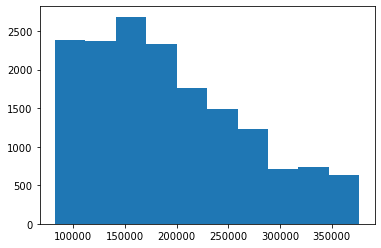

In [6]:
plt.hist(df["median_house_value"])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16347 entries, 1 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16347 non-null  float64
 1   latitude            16347 non-null  float64
 2   housing_median_age  16347 non-null  float64
 3   total_rooms         16347 non-null  float64
 4   total_bedrooms      16347 non-null  float64
 5   population          16347 non-null  float64
 6   households          16347 non-null  float64
 7   median_income       16347 non-null  float64
 8   median_house_value  16347 non-null  float64
 9   ocean_proximity     16347 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


In [8]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [9]:
#checking the percantage of the missing values
mis_val= df.isnull().sum() / len(df)
mis_val * 100

longitude             0.0
latitude              0.0
housing_median_age    0.0
total_rooms           0.0
total_bedrooms        0.0
population            0.0
households            0.0
median_income         0.0
median_house_value    0.0
ocean_proximity       0.0
dtype: float64

In [10]:
df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  16347.000000  16347.000000        16347.000000  16347.000000   
mean    -119.504192     35.510475           28.037071   2681.445648   
std        1.988109      2.104429           12.580307   2253.009475   
min     -124.350000     32.550000            1.000000      2.000000   
25%     -121.760000     33.910000           18.000000   1465.000000   
50%     -118.390000     34.190000           28.000000   2150.000000   
75%     -117.970000     37.700000           37.000000   3182.000000   
max     -114.490000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    16347.000000  16347.000000  16347.000000   16347.000000   
mean       552.941090   1484.298036    514.477213       3.730055   
std        436.946856   1184.079605    396.602755       1.413423   
min          2.000000      3.000000      2.000000       0.499900   
25%        301.000000    817.000000    287.000000       2.690050   
50%        444.000000   1206.000000    420.000000       3.564400   
75%        662.000000   1793.000000    618.000000       4.593700   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        16347.000000  
mean        192750.706552  
std          74495.468433  
min          82300.000000  
25%         133900.000000  
50%         179700.000000  
75%         241900.000000  
max         376600.000000

In [11]:
df.head(5)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   
5    -122.25     37.85                52.0        919.0           213.0   

   population  households  median_income  median_house_value ocean_proximity  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
5       413.0       193.0         4.0368            269700.0        NEAR BAY

In [12]:
df["ocean_proximity"].nunique()

5

In [13]:
df["ocean_proximity"].value_counts().head()

<1H OCEAN     7889
INLAND        4572
NEAR OCEAN    2089
NEAR BAY      1795
ISLAND           2
Name: ocean_proximity, dtype: int64

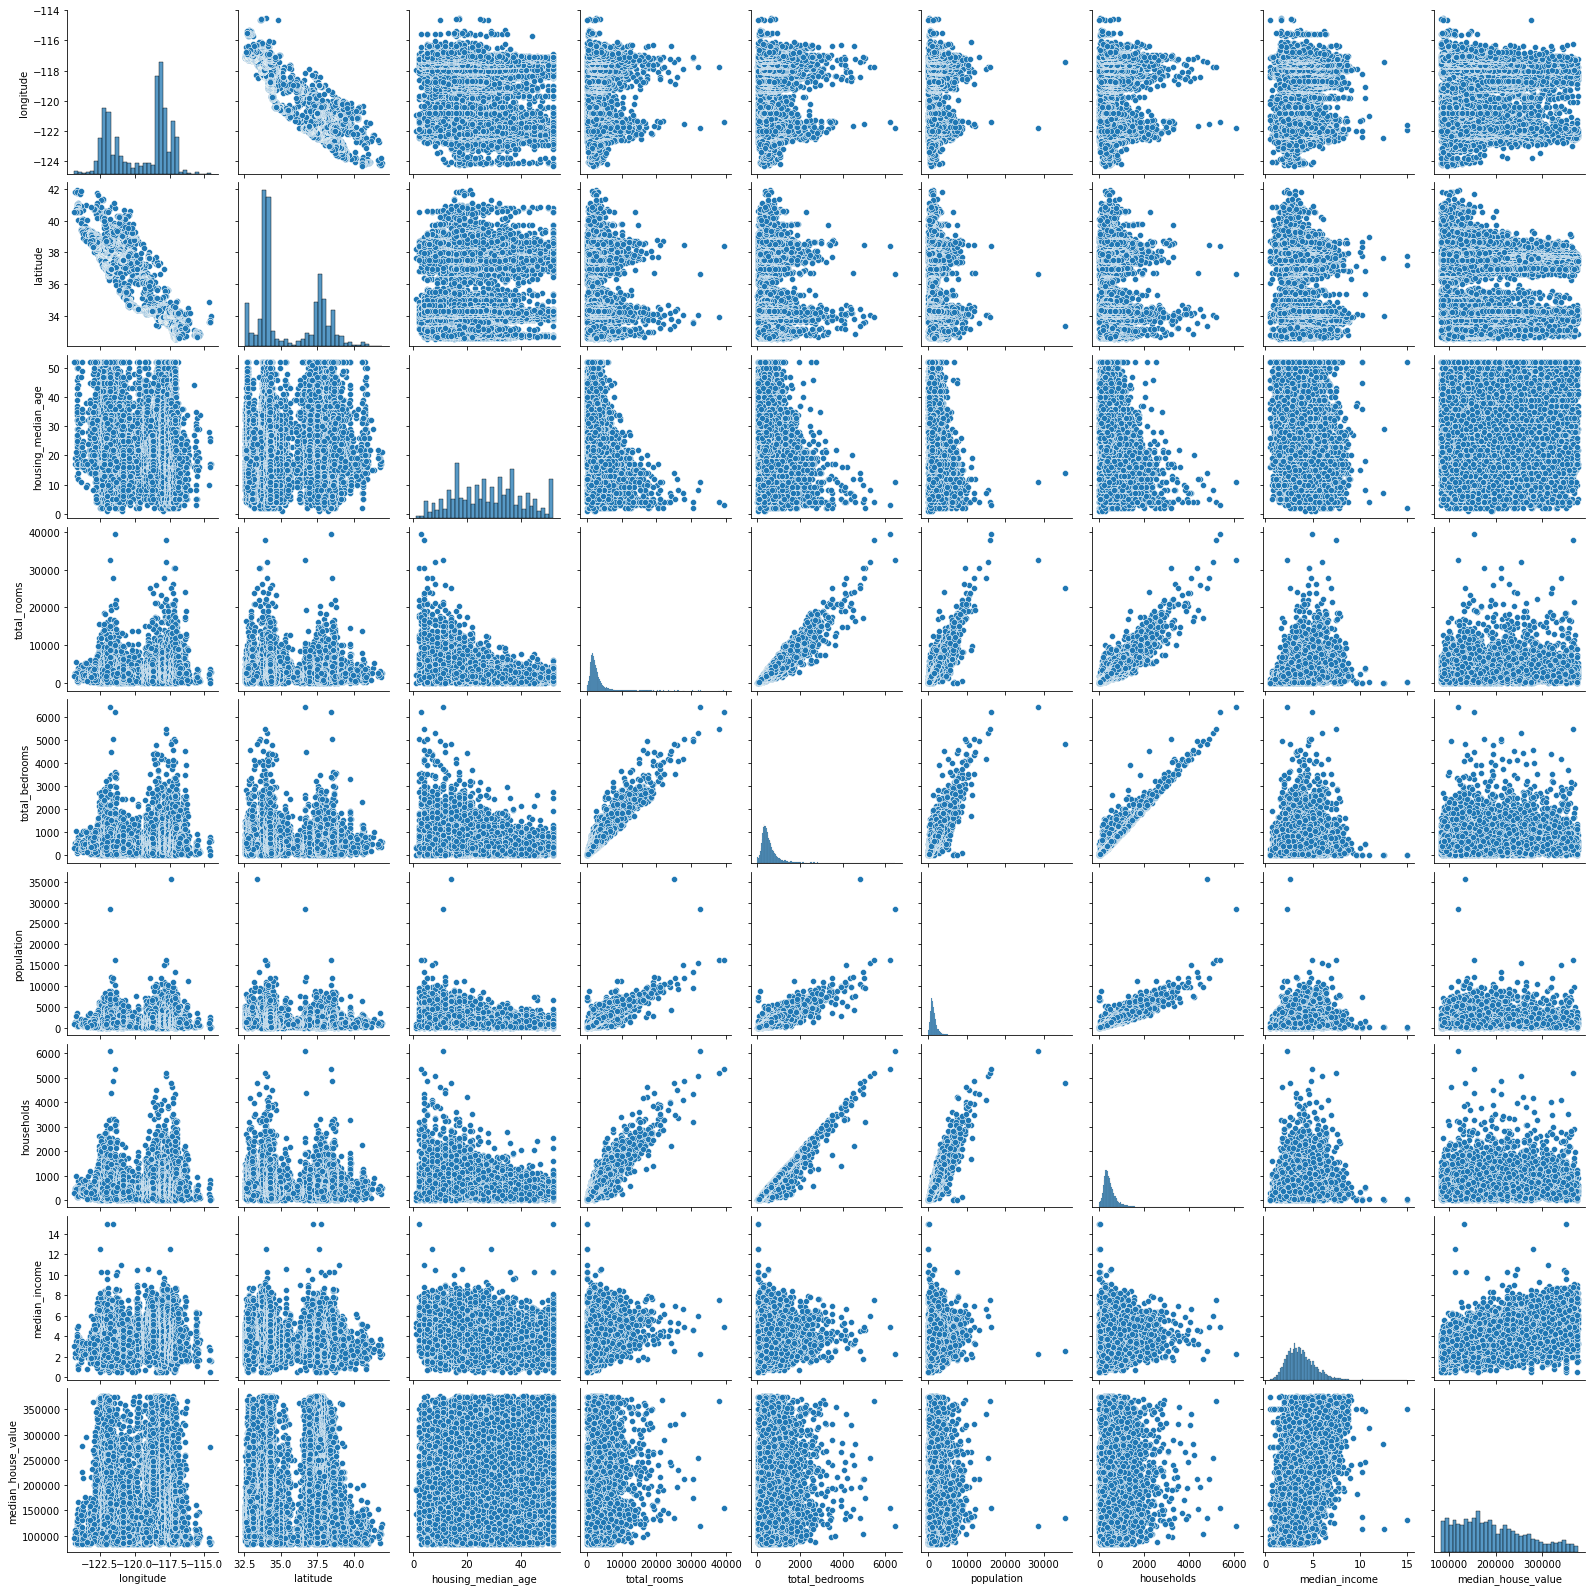

In [14]:
#Exploration
sns.pairplot(df)

In [15]:
# Check your work
assert df.shape == (16347, 10), f"`df` is the wrong size: {df.shape}"

<AxesSubplot:xlabel='median_house_value', ylabel='Density'>

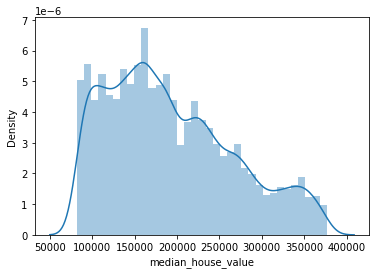

In [16]:
sns.distplot(df["median_house_value"])

In [17]:
#since we are predicitin the price of the house based on the location
#we'll create a mapbox scatter plot using plotly.express

fig = px.scatter_mapbox(
    df,
    lat = "latitude",
    lon = "longitude",
    width = 600,
    height= 600,
    color = "median_house_value",
    hover_data = ["median_house_value"],
)

fig.update_layout(mapbox_style = "open-street-map")
fig.show()

In [18]:
# Create 3D scatter plot
fig = px.scatter_3d(
    df,
    x="longitude",
    y="latitude",
    z="median_house_value",
    labels={"lon": "longitude", "lat": "latitude", "median_house_value": "price"},
    width=600,
    height=500,
)

# Refine formatting
fig.update_traces(
    marker={"size": 4, "line": {"width": 2, "color": "DarkSlateGrey"}},
    selector={"mode": "markers"},
)

# Display figure
fig.show()

In [19]:
#splitting the data into feature matrix and target vector
X = df[["longitude", "latitude"]]
y = df["median_house_value"]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [21]:
X_train.head()

longitude  latitude
1395     -122.07     37.98
10902    -117.86     33.75
3197     -119.67     36.35
4799     -118.36     34.03
2823     -119.08     35.42

In [22]:
y_train.head()

1395     186100.0
10902    154200.0
3197     118800.0
4799     143800.0
2823     132000.0
Name: median_house_value, dtype: float64

In [23]:
y_mean = y_train.mean()
round(y_mean, 2)
# [y_mean]

193173.62

In [24]:
y_pred_baseline = [y_mean] * len(y_train)
y_pred_baseline[:3]

[193173.6235725938, 193173.6235725938, 193173.6235725938]

In [25]:
mae_baseline =mean_absolute_error(y_train, y_pred_baseline)

print(f"The mean price of the house: ${round(y_mean,2)}")
print(f"The baseline mean absolute error: ${round(mae_baseline, 2)}")

The mean price of the house: $193173.62
The baseline mean absolute error: $61946.85


In [26]:
#This function will handle all the missing values in the datasets
inputer = SimpleImputer()

In [27]:
# Check your work
assert isinstance(inputer, SimpleImputer)

In [28]:
inputer.fit(X_train)

SimpleImputer()

In [29]:
# Check your work
check_is_fitted(inputer)

In [30]:
#Transform data using scikit learn
XT_train = inputer.transform(X_train)
pd.DataFrame(XT_train, columns=X_train.columns).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9808 entries, 0 to 9807
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   longitude  9808 non-null   float64
 1   latitude   9808 non-null   float64
dtypes: float64(2)
memory usage: 153.4 KB


In [31]:
model = make_pipeline(
        SimpleImputer(),
        LinearRegression()
)

In [32]:
#you're good to fit your model
model.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('linearregression', LinearRegression())])

In [33]:
y_pred_training = model.predict(X_train)

In [34]:
mae_training = mean_absolute_error(y_train, y_pred_training)
print(f"The mean absolute error value for the train_model: ${round(mae_training, 2)}")

The mean absolute error value for the train_model: $54165.66


In [35]:
#predictions from our model

predictions = model.predict(X_test)

In [36]:
test_mae = mean_absolute_error(y_test, predictions)
print(f"The test mean absolute error: ${round(test_mae, 2)}")

The test mean absolute error: $53225.73
